# Réseau de neurones
Nous allons, illustrer notre exemple de réseau de neurone sur une datase qui consiste predire si un étudiant va terminer ou pas 
ses études en nous basant sur certains critères

## Importation des packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Création de la dataset

In [2]:
df = pd.read_csv('./../data/StudentsPerformance.csv')
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


## Data preprocessing

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
import numpy as np
for col in df.columns:
    messing_val = 0
    for v in df[col]:
        if v == np.nan:
            messing_val += 1
    print(f'la colonne **{col}** à {messing_val} donnée(s) manquante(s)')

la colonne **gender** à 0 donnée(s) manquante(s)
la colonne **race/ethnicity** à 0 donnée(s) manquante(s)
la colonne **parental level of education** à 0 donnée(s) manquante(s)
la colonne **lunch** à 0 donnée(s) manquante(s)
la colonne **test preparation course** à 0 donnée(s) manquante(s)
la colonne **math score** à 0 donnée(s) manquante(s)
la colonne **reading score** à 0 donnée(s) manquante(s)
la colonne **writing score** à 0 donnée(s) manquante(s)


In [5]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [19]:
## Le rôle de cette methode est de transformer les variables catégorielles en variable numériques, les standardisées et 
## les retourner
def data_preprocessing(df=df):
    labelEncoder = LabelEncoder()
    standardScaler = StandardScaler()
    target = []
    result = df.copy()
    data = df.copy()
    resulat_value = []
    for i in range(0, 5):
        try:
            # Transformation des variable catégorielle en variable nuémerique
            data.iloc[:, i] = labelEncoder.fit_transform(data.iloc[:, i])
            # suppression de la colonne **test preparation course**
            data.drop(['test preparation course'], axis=1, inplace=True)
        except KeyError:
            pass
    [resulat_value.append(df.iloc[:, 4][i]) for i in range(1, 3) ]
    result.iloc[:, 4] = labelEncoder.fit_transform(result.iloc[:, 4])
    target = result.iloc[:, 4]
    # Standardisation
    data = standardScaler.fit_transform(data)
    return data, target, resulat_value

In [20]:
X, y, r = data_preprocessing()

In [21]:
r

['completed', 'none']

In [41]:
print(f'Nous avons {X.shape[1]} variable(s) indépendante(s)')

Nous avons 7 variable(s) indépendante(s)


In [335]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True )

In [336]:
print(f'La taille de train set est: {x_train.shape[0]}\n La taille de test set est: {x_test.shape[0]}')
print(f'La taille de test set est: {x_test.shape}')
print(f'La taille de test set est: {y_test.shape}')

La taille de train set est: 750
 La taille de test set est: 250
La taille de test set est: (250, 7)
La taille de test set est: (250,)


## Création de notre réseau de neuron

In [337]:
## Model simple avec Sequential
model = Sequential()
## création de la couche cachée
couche_cachee = Dense(30, input_dim=7, activation='relu')
couche_cachee2 = Dense(20, activation='relu')
couche_cachee3 = Dense(5, activation='relu')
couche_sortie = Dense(1, activation='sigmoid')
model.add( couche_cachee )
model.add( couche_cachee2 )
model.add( couche_cachee3 )

model.add( couche_sortie )
model.compile( optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [338]:
model.summary()
model.build()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 30)                240       
_________________________________________________________________
dense_275 (Dense)            (None, 20)                620       
_________________________________________________________________
dense_276 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_277 (Dense)            (None, 1)                 6         
Total params: 971
Trainable params: 971
Non-trainable params: 0
_________________________________________________________________


In [339]:
history = model.fit(x_train, y_train, epochs=65)
history

Epoch 1/65
24/24 [==============================] - 0s 1ms/step - loss: 0.6780 - accuracy: 0.6507
Epoch 2/65
24/24 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.6507
Epoch 3/65
24/24 [==============================] - 0s 1ms/step - loss: 0.6309 - accuracy: 0.6507
Epoch 4/65
24/24 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.6507
Epoch 5/65
24/24 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.6507
Epoch 6/65
24/24 [==============================] - 0s 1ms/step - loss: 0.6013 - accuracy: 0.6507
Epoch 7/65
24/24 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6507
Epoch 8/65
24/24 [==============================] - 0s 1ms/step - loss: 0.5926 - accuracy: 0.6507
Epoch 9/65
24/24 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.6507
Epoch 10/65
24/24 [==============================] - 0s 2ms/step - loss: 0.5867 - accuracy: 0.6507
Epoch 11/65
24/24 [

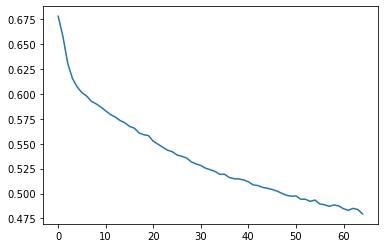

In [341]:
plt.plot(history.history['loss'])

In [342]:
lost, acc = model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7280


In [343]:
lost

0.5506669282913208

In [344]:
acc

0.7279999852180481

In [350]:
model.predict(np.array([x_test[3]]))

array([[0.38981417]], dtype=float32)

In [382]:
for i,v in enumerate(y_test): 
    print('modèle: {} -> dataset: {}'.format(r[int(np.round(model.predict(np.array([x_test[i]]))[0][0]))], r[v]))

modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: none
modèle: completed -> dataset: completed
modèle: completed -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: completed
modèle: completed -> dataset: none
modèle: none -> dataset: completed
modèle: completed -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: completed
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: completed
modèle: completed -> dataset: completed
modèle: none -> dataset: completed
modèle: none -> dataset: none
modèle: completed -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: none
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: completed
modèle: none -> dataset: completed
modèle: completed -> dataset: 

modèle: completed -> dataset: completed
modèle: none -> dataset: completed
modèle: none -> dataset: none
modèle: none -> dataset: none
modèle: completed -> dataset: none


In [352]:
df.iloc[:, 4][101]

'completed'